In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns
from IPython.display import Image

%matplotlib inline

In [18]:
import pandas as pd
import seaborn as sns
import pandasql as pdsql

# read csv into panda data frame to see values read from file into data frame
subway=pd.read_csv('mta-spring2016-rev01.csv') 

#set up and execute sql to get average number of entries for a station-time on a weekday
pysql = lambda q: pdsql.sqldf(q, globals())
pd.options.display.float_format = '{:,.2f}'.format



In [38]:
str5 = "select station,time,sum(entries),sum(exits) from subway where station ='14 ST-UNION SQ' and (day < 5) group by time order by sum(entries) desc;"
df5 = pysql(str5)
df5
#Plot 

,STATION,TIME,sum(entries),sum(exits)
0,14 ST-UNION SQ,21,2348765,1347738
1,14 ST-UNION SQ,17,1713046,1249810
2,14 ST-UNION SQ,13,882045,1499634
3,14 ST-UNION SQ,1,842970,266363
4,14 ST-UNION SQ,9,518884,1072824
5,14 ST-UNION SQ,5,77492,36720


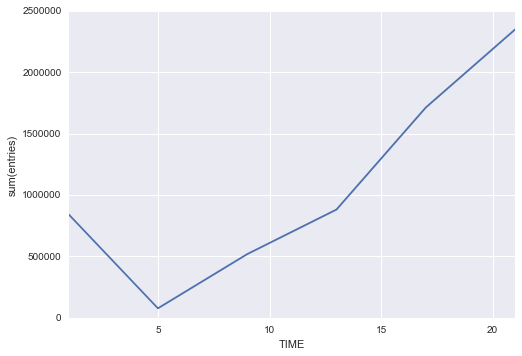

In [54]:
sns.tsplot(df5, time="TIME", unit="STATION", condition=None, value="sum(entries)")

In [32]:
str6 = "SELECT station,time,day,avg(entries) FROM subway WHERE (day < 5) GROUP BY time order by avg(entries) desc LIMIT 20;"
df6 = pysql(str6)
df6

,STATION,TIME,DAY,avg(entries)
0,WILSON AV,19,2,"14,619.58"
1,9TH STREET,18,2,"8,620.30"
2,TOMPKINSVILLE,22,4,"6,441.05"
3,TOMPKINSVILLE,10,4,"5,012.44"
4,PENNSYLVANIA AV,20,4,"4,788.22"
5,WILSON AV,15,3,"4,742.37"
6,LACKAWANNA,23,4,"4,166.70"
7,TOMPKINSVILLE,14,4,"3,796.04"
8,PENNSYLVANIA AV,12,4,"3,756.70"
9,WALL ST,11,1,"3,461.78"


In [33]:
str7 = "SELECT station,time,day,avg(entries) FROM subway WHERE (day < 5) GROUP BY day order by avg(entries) desc LIMIT 20;"
df7 = pysql(str7)
df7

,STATION,TIME,DAY,avg(entries)
0,PENNSYLVANIA AV,20,2,"2,405.64"
1,PENNSYLVANIA AV,20,3,"2,404.22"
2,PENNSYLVANIA AV,20,1,"2,357.23"
3,PENNSYLVANIA AV,20,4,"2,325.13"
4,PENNSYLVANIA AV,20,0,"2,058.54"


In [34]:
str8 = "SELECT station,time,day,avg(entries) FROM subway WHERE (day < 5) order by avg(entries) desc LIMIT 20;"
df8 = pysql(str8)
df8

,STATION,TIME,DAY,avg(entries)
0,PENNSYLVANIA AV,20,4,"2,310.15"


In [35]:
str9 = "select time,max(entries),avg(entries),min(entries),max(exits),avg(exits),min(exits) from subway where (day < 5) group by time ORDER BY avg(entries) desc;"
df9 = pysql(str9)
df9

,TIME,max(entries),avg(entries),min(entries),max(exits),avg(exits),min(exits)
0,19,17118,"14,619.58",0,7271,"5,053.06",0
1,18,15065,"8,620.30",0,16891,"5,250.00",0
2,22,11021,"6,441.05",0,11289,"3,168.28",0
3,10,26039,"5,012.44",0,18702,"7,148.28",0
4,20,56687,"4,788.22",0,48059,"3,505.30",0
5,15,7099,"4,742.37",0,5997,"5,376.92",0
6,23,5404,"4,166.70",0,6526,"2,367.46",0
7,14,9790,"3,796.04",0,8749,"3,977.41",0
8,12,38133,"3,756.70",0,39873,"3,165.70",0
9,11,4606,"3,461.78",0,17489,"14,842.83",0


In [ ]:
str3 = "SELECT station,time,day,max(entries), avg(entries), min(entries) FROM subway WHERE station IN ('34 ST-HERALD SQ','TIMES SQ-42 ST','14 ST-UNION SQ','34 ST-PENN STA') and (day < 6) GROUP BY time,day;"
df3 = pysql(str3)
df3

In [ ]:
sns.lmplot('TIME', 'avg(entries)', data=df3)

In [ ]:
sns.stripplot(x="TIME", y="avg(entries)", data=df3);

In [ ]:
df3.hist(column='avg(entries)', by='STATION',figsize=(10,6))